<a href="https://colab.research.google.com/github/SmartDogy/Deep-Fried-Learning/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset = dataset.drop('User ID', axis=1)
dataset = dataset.drop('Gender', axis=1)

In [6]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
X = dataset.iloc[:, 0:2].values
Y = dataset.iloc[:,2].values

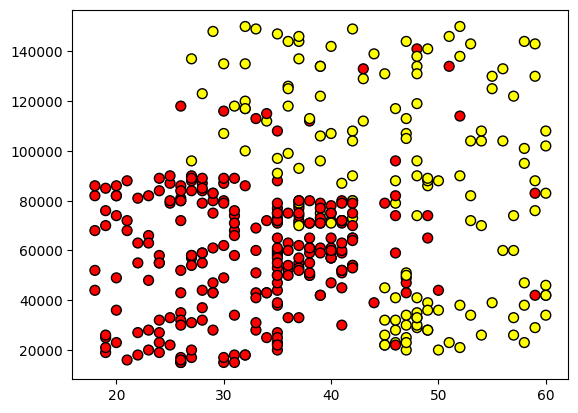

In [13]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='autumn', s=50, edgecolors='black')

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Without Normalization

In [24]:
model1 = Sequential([
    Input(shape=(2,)),
    Dense(8, 'relu'),
    Dense(4, 'relu'),
    Dense(1, 'sigmoid')
])

In [25]:
model1.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [26]:
history = model1.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6196 - loss: 4583.3452 - val_accuracy: 0.6500 - val_loss: 2949.1809
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6328 - loss: 3379.7400 - val_accuracy: 0.6500 - val_loss: 1591.7025
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6514 - loss: 1431.0277 - val_accuracy: 0.6500 - val_loss: 206.6514
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4815 - loss: 246.6833 - val_accuracy: 0.3500 - val_loss: 403.8963
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4743 - loss: 225.5467 - val_accuracy: 0.6500 - val_loss: 207.8593
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6162 - loss: 184.3798 - val_accuracy: 0.3500 - val_loss: 201.7060
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3919 - loss: 147.2825 - val_accuracy: 0.6500 - val_loss: 7.7320
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4656 - loss: 45.068

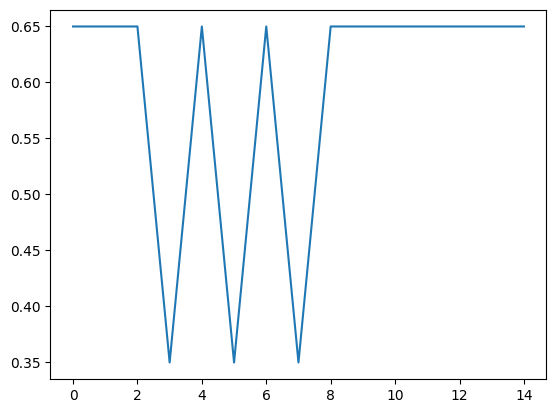

In [27]:
plt.plot(history.history['val_accuracy'])

With Normalization

In [28]:
scaler = StandardScaler()

In [29]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
model2 = Sequential([
    Input(shape=(2,)),
    Dense(8, 'relu'),
    Dense(4, 'relu'),
    Dense(1, 'sigmoid')
])

In [31]:
model2.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [32]:
history_normal = model2.fit(x_train_scaled, y_train, epochs=15, validation_data=(x_test_scaled, y_test))

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4167 - loss: 0.7086 - val_accuracy: 0.4625 - val_loss: 0.6682
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4448 - loss: 0.6786 - val_accuracy: 0.4875 - val_loss: 0.6538
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5020 - loss: 0.6605 - val_accuracy: 0.5625 - val_loss: 0.6419
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4984 - loss: 0.6608 - val_accuracy: 0.6250 - val_loss: 0.6311
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5695 - loss: 0.6559 - val_accuracy: 0.7000 - val_loss: 0.6214
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5700 - loss: 0.6503 - val_accuracy: 0.7125 - val_loss: 0.6127
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6456 - loss: 0.6285 - val_accuracy: 0.7500 - val_loss: 0.6047
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6937 - loss: 0.6266 - val_accuracy: 0.7750 - val_lo

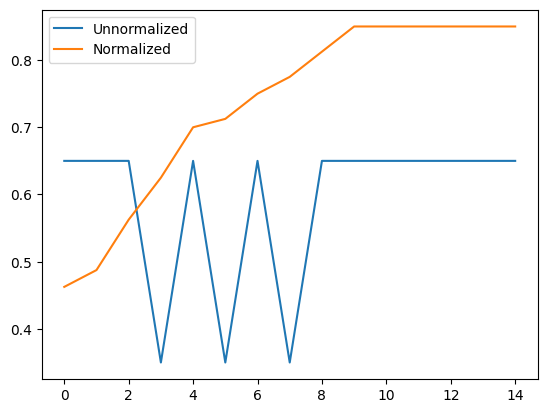

In [33]:
plt.plot(history.history['val_accuracy'], label='Unnormalized')
plt.plot(history_normal.history['val_accuracy'], label='Normalized')
plt.legend()